# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | egvekinot
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | derzhavinsk
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | micheweni
Processing Record 6 of Set 1 | kolo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | yerbogachen
Processing Record 9 of Set 1 | banda aceh
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | nieves
Processing Record 13 of Set 1 | gushikawa
Processing Record 14 of Set 1 | nizhnevartovsk
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | svetlopolyansk
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | vanavara
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | puerto ayora
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

cities = city_data_df["City"]
lats = city_data_df["Lat"]
lnds = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
countries = city_data_df["Country"]
dates = city_data_df["Date"]

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,egvekinot,66.3167,-179.1667,20.01,85,100,15.21,RU,1667878711
1,kapaa,22.0752,-159.3190,82.38,80,40,17.27,US,1667878712
2,derzhavinsk,51.1000,66.3167,24.24,93,77,4.83,KZ,1667878712
3,thompson,55.7435,-97.8558,-11.04,84,0,3.44,CA,1667878712
4,micheweni,-4.9667,39.8333,78.58,83,13,3.74,TZ,1667878713


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egvekinot,66.3167,-179.1667,20.01,85,100,15.21,RU,1667878711
1,kapaa,22.0752,-159.3190,82.38,80,40,17.27,US,1667878712
2,derzhavinsk,51.1000,66.3167,24.24,93,77,4.83,KZ,1667878712
3,thompson,55.7435,-97.8558,-11.04,84,0,3.44,CA,1667878712
4,micheweni,-4.9667,39.8333,78.58,83,13,3.74,TZ,1667878713


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

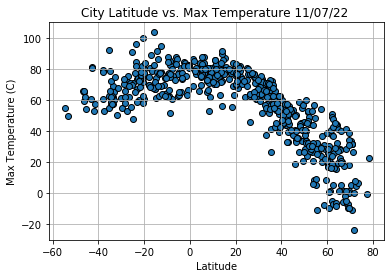

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime(" %x "))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

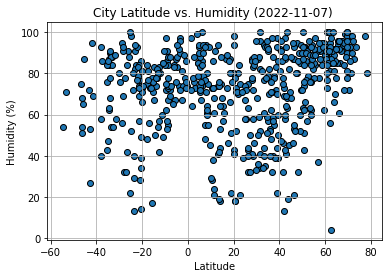

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime(" (%Y-%m-%d) "))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

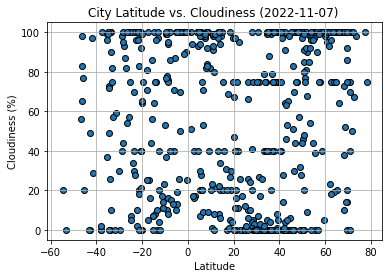

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness" + time.strftime(" (%Y-%m-%d) "))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

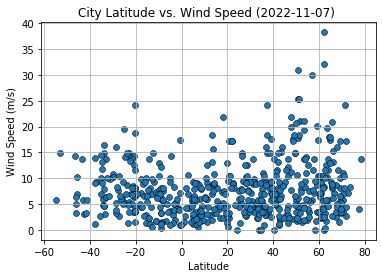

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black", linewidths=0.5, marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime(" (%Y-%m-%d) "))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egvekinot,66.3167,-179.1667,20.01,85,100,15.21,RU,1667878711
1,kapaa,22.0752,-159.3190,82.38,80,40,17.27,US,1667878712
2,derzhavinsk,51.1000,66.3167,24.24,93,77,4.83,KZ,1667878712
3,thompson,55.7435,-97.8558,-11.04,84,0,3.44,CA,1667878712
5,kolo,52.2002,18.6387,44.92,92,90,7.94,PL,1667878713


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,micheweni,-4.9667,39.8333,78.58,83,13,3.74,TZ,1667878713
6,ushuaia,-54.8000,-68.3000,55.02,54,20,5.75,AR,1667878713
16,hithadhoo,-0.6000,73.0833,82.65,74,25,17.31,MV,1667878717
18,bambous virieux,-20.3428,57.7575,77.22,73,40,8.05,MU,1667878717
21,puerto ayora,-0.7393,-90.3518,66.54,86,90,1.01,EC,1667878601


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7642739982067794


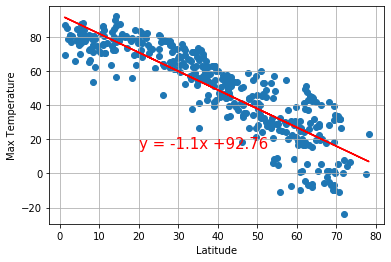

In [23]:
# # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize = 15,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 
plt.show()

The r-value is: 0.1807083649242964


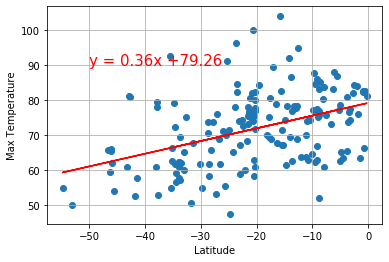

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,90),fontsize = 15,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}") 

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10567394185680429


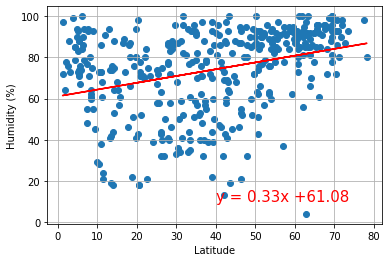

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Show plot
plt.show()

The r-value is: 0.1807083649242964


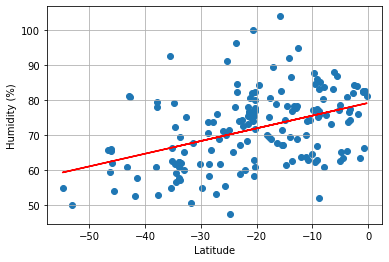

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,40),color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05654700130250531


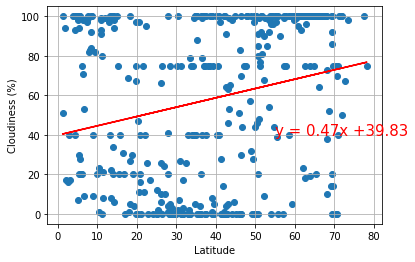

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(55,40),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Show plot
plt.show()

The r-value is: 0.01646779403300496


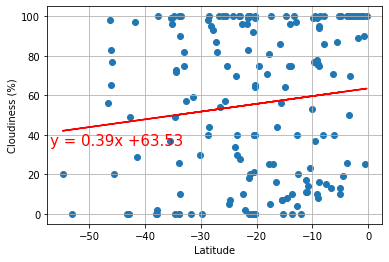

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-57,35),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.052164859010611214


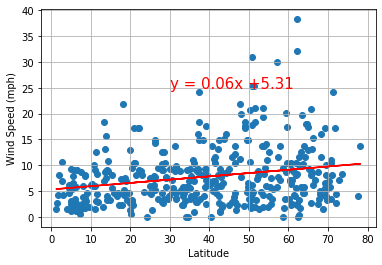

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 


# Show plot
plt.show()

The r-value is: 0.01646779403300496


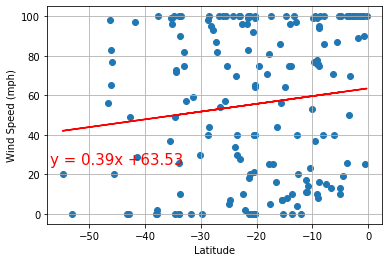

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-57,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE